In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # <-- IMPORT SVM
from sklearn.preprocessing import StandardScaler # <-- IMPORT SCALER
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [13]:
# ==========================================
# 1. LOAD DATA
# ==========================================
df = pd.read_csv('Flood_Datasets.csv')

In [14]:
# ==========================================
# 2. PREPROCESSING
# ==========================================
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [15]:
# Split Data (Blind Test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

In [16]:
# Prepare Features (X) and Answers (y)
X_train = train_df.drop(columns=['FloodOccurrence', 'Date'])
y_train = train_df['FloodOccurrence']

X_test = test_df.drop(columns=['FloodOccurrence', 'Date'])
y_secret_key = test_df['FloodOccurrence']

In [17]:
# --- SVM: SCALING ---
# SVM gets confused if numbers are different sizes (e.g., Rain vs Elevation).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# ==========================================
# 3. TRAIN ALL 3 MODELS
# ==========================================

# Model 1: Logistic Regression
print("\nTraining Logistic Regression...")
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train) # Use scaled data
y_pred_log = log_model.predict(X_test_scaled)

# Model 2: Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # RF doesn't strictly need scaling
y_pred_rf = rf_model.predict(X_test)

# Model 3: Support Vector Machine (SVM)
print("Training SVM...")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train) # SVM NEEDS scaled data
y_pred_svm = svm_model.predict(X_test_scaled)


Training Logistic Regression...
Training Random Forest...
Training SVM...


In [19]:
# ==========================================
# 4. GRADE THE MODELS
# ==========================================
def grade_model(name, predictions):
    print(f"\n--- {name} Report ---")
    print(f"Accuracy:  {accuracy_score(y_secret_key, predictions):.2%}")
    print(f"Precision: {precision_score(y_secret_key, predictions, zero_division=0):.2%}")
    print(f"Recall:    {recall_score(y_secret_key, predictions, zero_division=0):.2%}")
    print(f"F1-Score:  {f1_score(y_secret_key, predictions, zero_division=0):.4f}")

("Logistic Regression", y_pred_lograde_modelg)
grade_model("Random Forest", y_pred_rf)
grade_model("SVM", y_pred_svm)


--- Logistic Regression Report ---
Accuracy:  99.86%
Precision: 100.00%
Recall:    89.47%
F1-Score:  0.9444

--- Random Forest Report ---
Accuracy:  100.00%
Precision: 100.00%
Recall:    100.00%
F1-Score:  1.0000

--- SVM Report ---
Accuracy:  100.00%
Precision: 100.00%
Recall:    100.00%
F1-Score:  1.0000


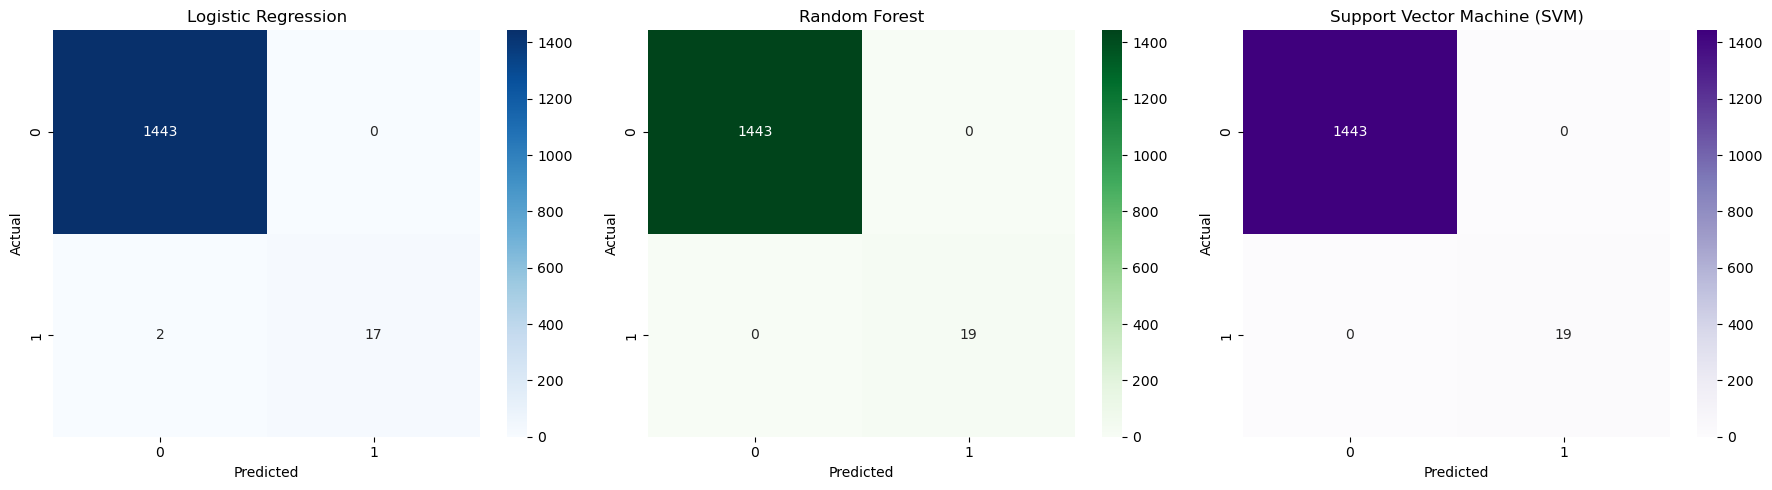

In [21]:
# ==========================================
# 5. VISUALIZATION (Comparison)
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Logistic Regression
sns.heatmap(confusion_matrix(y_secret_key, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Plot 2: Random Forest
sns.heatmap(confusion_matrix(y_secret_key, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Plot 3: SVM
sns.heatmap(confusion_matrix(y_secret_key, y_pred_svm), annot=True, fmt='d', cmap='Purples', ax=axes[2])
axes[2].set_title('Support Vector Machine (SVM)')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('model-visualization.png')
plt.show()